In [1]:
import torch
from sd_pipeline import StableDiffusion3Pipeline
from sd_processor import JointAttnProcessor2_0
pipe = StableDiffusion3Pipeline.from_pretrained("stabilityai/stable-diffusion-3.5-medium", torch_dtype=torch.bfloat16)
pipe = pipe.to("cuda")

/home/wg25r/miniconda/envs/mochi/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading pipeline components...: 100%|██████████| 9/9 [00:02<00:00,  3.04it/s]


In [2]:
negative_prompt = "there are trees in the image"
pipe.tokenizer.tokenize(negative_prompt)

['there</w>', 'are</w>', 'trees</w>', 'in</w>', 'the</w>', 'image</w>']

In [3]:
for block in pipe.transformer.transformer_blocks:
    block.attn.processor = JointAttnProcessor2_0()
    block.attn.processor.neg_prompt_len=len(pipe.tokenizer.tokenize(negative_prompt)) + 1

100%|██████████| 16/16 [00:07<00:00,  2.02it/s]


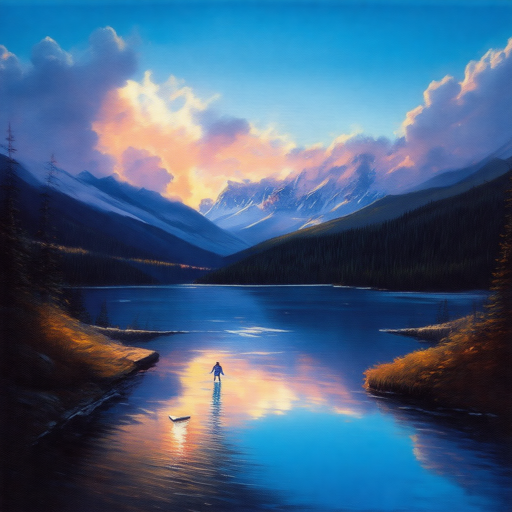

In [9]:
image = pipe(
    "a beautiful landscape in Canada, in the style of Bob Ross",
    negative_prompt=negative_prompt,
    num_inference_steps=16,
    avoidance_factor=4.5, 
    guidance_scale=8,
    # generator=torch.manual_seed(46), 
).images[0] 
image.resize((512, 512)) 

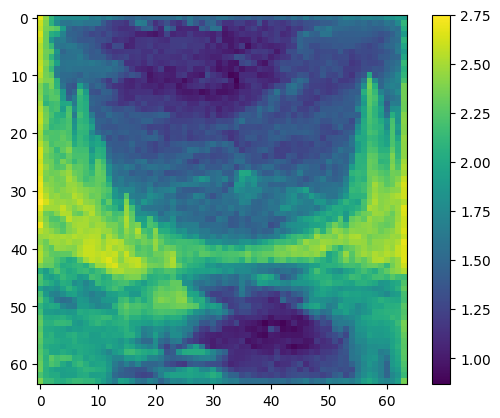

In [5]:
import pylab 
map = torch.stack(pipe.neg_maps)[10].mean((0,1,2,3)).reshape(64, 64).cpu().float().numpy()
pylab.imshow(map) 
pylab.colorbar()

In [6]:
map = torch.stack(pipe.neg_maps)[0].mean((0,1,2,3)).reshape(64, 64).cpu().float().numpy()
